In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
df['target'] = cancer.target

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 4.a Find the mean centered dataset

In [ ]:
feature_means = df.mean(axis=0)
df_centered = df - feature_means
df_centered.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,3.862708,-8.909649,30.830967,346.110896,0.02204,0.173259,0.211301,0.098181,0.060738,0.015912,...,-8.347223,77.338787,1138.416872,0.029831,0.411335,0.439712,0.150794,0.170024,0.034954,-0.627417
1,6.442708,-1.519649,40.930967,671.110896,-0.01162,-0.025701,-0.001899,0.021251,0.000038,-0.006128,...,-2.267223,51.538787,1075.416872,-0.008569,-0.067665,-0.030588,0.071394,-0.015076,0.005074,-0.627417
2,5.562708,1.960351,38.030967,548.110896,0.01324,0.055559,0.108601,0.078981,0.025738,-0.002808,...,-0.147223,45.238787,828.416872,0.012031,0.170235,0.178212,0.128394,0.071224,0.003634,-0.627417
3,-2.707292,1.090351,-14.389033,-268.789104,0.04614,0.179559,0.152601,0.056281,0.078538,0.034642,...,0.822777,-8.391213,-312.883128,0.077431,0.612035,0.414712,0.142894,0.373724,0.089054,-0.627417
4,6.162708,-4.949649,43.130967,642.110896,0.00394,0.028459,0.109201,0.055381,-0.000262,-0.003968,...,-9.007223,44.938787,694.416872,0.005031,-0.049265,0.127812,0.047894,-0.053676,-0.007166,-0.627417


## 4.b Find eigenvalues and associated eigenvectors of the covariance matrix of the mean centered dataset

In [ ]:
##Computing the covariance matrix of the mean-centered data
covariance_matrix = np.cov(df_centered.T)

In [ ]:
##Finding the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
print("Eigen Values :", eigenvalues)
print("Eigen Vectors :" , eigenvectors[:2])

Eigen Values : [4.43782731e+05 7.31010042e+03 7.03835911e+02 5.46765536e+01
 3.98909017e+01 3.00468545e+00 1.81600598e+00 3.71490114e-01
 1.57638222e-01 8.94562862e-02 7.63720871e-02 2.41467765e-02
 7.48570432e-03 3.16162185e-03 2.11322347e-03 1.32278872e-03
 6.11716333e-04 3.66088214e-04 2.34503549e-04 1.84354282e-04
 1.63252755e-04 7.68277351e-05 5.67151947e-05 3.44562749e-05
 2.83858895e-05 1.61437491e-05 1.24607530e-05 7.01467685e-07
 3.62589141e-06 2.84316263e-06 1.99720307e-06]
Eigen Vectors : [[ 5.08623135e-03  9.28705507e-03 -1.23426787e-02 -3.42363832e-02
  -3.54414167e-02 -1.31220714e-01  3.34710981e-02  7.55613650e-02
  -3.32744005e-01 -2.33550914e-01  8.09730546e-02  3.76882149e-01
  -7.40584615e-01  2.18561522e-01  6.52255865e-02 -1.34552867e-01
  -1.41782195e-01 -3.65712113e-02  9.01874611e-02  1.89701015e-02
   8.05950089e-02 -5.83032333e-02  1.15350844e-02 -3.22834637e-03
  -2.82072161e-02 -3.62168162e-03  1.70700803e-03 -6.71785669e-04
  -2.87607696e-03  3.35634753e-03

## 4.c Plot percent of variance explained by each of the principal components (Scree Plot) and explain

Explained Variance :  [9.83773393e-01 1.62049620e-02 1.56025684e-03 1.21206471e-04
 8.84297765e-05 6.66075850e-06 4.02570501e-06 8.23515798e-07
 3.49450930e-07 1.98305856e-07 1.69300926e-07 5.35283475e-08
 1.65942391e-08 7.00865364e-09 4.68457395e-09 2.93234561e-09
 1.35604702e-09 8.11540917e-10 5.19845266e-10 4.08674842e-10
 3.61897175e-10 1.70311002e-10 1.25725711e-10 7.63823468e-11
 6.29255733e-11 3.57873116e-11 2.76228802e-11 8.03784205e-12
 6.30269622e-12 4.42738101e-12 1.55500698e-12]


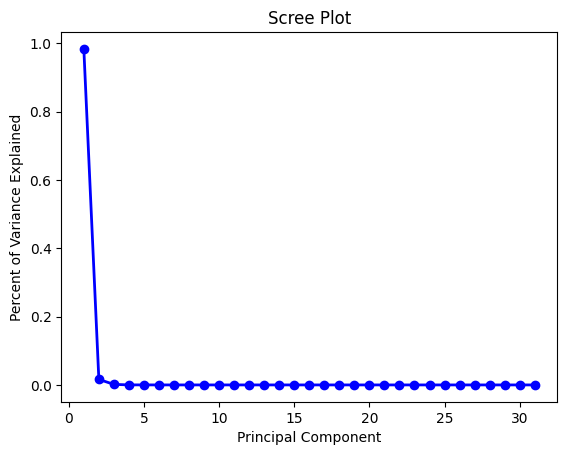

In [ ]:
##Sorting the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

##Computing the total variance of the data
total_variance = np.sum(np.var(df_centered, axis=0))

##Computing the percent of variance explained by each principal component
explained_variance_ratio_cov = eigenvalues / total_variance

print("Explained Variance : ", explained_variance_ratio_cov)

##scree plot
plt.plot(np.arange(1, len(explained_variance_ratio_cov)+1), explained_variance_ratio_cov, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Percent of Variance Explained')
plt.title('Scree Plot')
plt.show()


To determine the optimal number of principal components to retain for reducing the dimension of the original data, we can examine the scree plot of the percent of variance explained by each principal component. The scree plot shows the percent of variance explained on the y-axis and the principal component number on the x-axis. The point of diminishing returns is where the slope of the scree plot levels off and the remaining principal components contribute relatively little to the explained variance. Alternatively, one can use a rule of thumb such as keeping the components that explain a certain percentage of the total variance (e.g., 80% or 90%). Ultimately, the choice of the number of principal components depends on the specific context and goals of the analysis.

## 4.d. What is the optimal number principal components you will retain for reduce the dimension of the original data? Give proper explanation

From the scree plot, we can see that the first few principal components explain a large amount of the variance in the data, but as we move to higher principal components, the percent of variance explained by each component decreases. There is a noticeable point of diminishing returns around the 4th or 5th principal component, where the slope of the scree plot levels off. Therefore, we might choose to retain the first 4 or 5 principal components and discard the rest, as these components capture most of the information in the original data.


## 4.e Create a scatter plot with each of the observations of the dataset projected onto the first two principal components and use a different color for each group and include a legend.

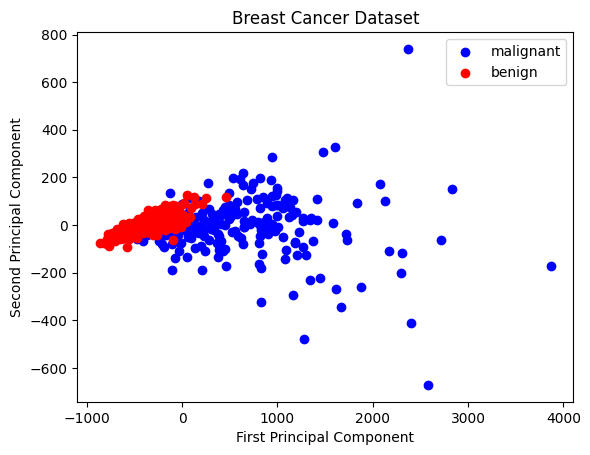

In [ ]:
labels = load_breast_cancer().target

##Projecting the data onto the first two principal components
data_projected = np.dot(df_centered, eigenvectors[:, :2])

##Creating a list of colors for each group
colors = ['blue', 'red']

##Creating a scatter plot with the projected data and color each group
for i, color in enumerate(colors):
    x = data_projected[labels == i, 0]
    y = data_projected[labels == i, 1]
    plt.scatter(x, y, color=color, label=load_breast_cancer().target_names[i])

plt.title('Breast Cancer Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()

## 5 . In problem 4, you have used covariance matrix to find the variability of the mean centered data. Now, apply correlation matrix (normalized version of the covariance matrix) instead of covariance matrix and plot the scree plot principal components. Finally, compare the two scree plots.


In [ ]:
##Computing the correlation matrix of the mean-centered data
correlation_matrix = np.corrcoef(df_centered.T)

In [ ]:
##Finding the eigenvalues and eigenvectors of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [ ]:
print('Eigen Value :', eigenvalues)
print('Eigen Vector :', eigenvectors[:2])

Eigen Value : [1.39177709e+01 5.72635217e+00 2.84684948e+00 1.99836314e+00
 1.65907858e+00 1.20750790e+00 6.84719154e-01 4.84855438e-01
 4.16894830e-01 3.50893638e-01 3.04855395e-01 2.90985845e-01
 2.61010421e-01 2.12275550e-01 1.48576184e-01 8.81625619e-02
 7.98601726e-02 5.90353306e-02 5.14619081e-02 4.82159487e-02
 1.32634701e-04 7.41678754e-04 1.58846728e-03 6.86973193e-03
 8.05614370e-03 1.54733379e-02 1.75522144e-02 2.42835925e-02
 2.73446674e-02 2.95266509e-02 3.07062788e-02]
Eigen Vector : [[-2.16399142e-01 -2.26544730e-01  2.52701218e-03 -5.04480406e-02
   4.17514426e-02 -1.92387685e-02  1.13375192e-01  2.64950105e-02
  -2.23138417e-01  9.94528633e-02  3.53081074e-02 -6.58312316e-02
   4.69301068e-02 -3.17640848e-02 -4.91407421e-02  6.02915616e-02
   1.49679942e-01 -1.97432246e-01  2.37827952e-01 -1.32340264e-01
  -7.02475498e-01 -2.06961991e-01  2.12824112e-01  1.41750577e-01
   1.30571296e-01 -2.42793473e-02  1.84560235e-01 -9.46712145e-02
  -7.12837755e-02 -7.71942331e-02 -

Explained Variance : [4.48960353e-01 1.84721038e-01 9.18338543e-02 6.44633272e-02
 5.35186638e-02 3.89518676e-02 2.20877147e-02 1.56404980e-02
 1.34482203e-02 1.13191496e-02 9.83404501e-03 9.38664017e-03
 8.41969101e-03 6.84759840e-03 4.79278013e-03 2.84395361e-03
 2.57613460e-03 1.90436550e-03 1.66006155e-03 1.55535318e-03
 9.90525123e-04 9.52472611e-04 8.82086046e-04 7.83341693e-04
 5.66200463e-04 4.99139931e-04 2.59875603e-04 2.21604256e-04
 5.12408800e-05 2.39251211e-05 4.27853873e-06]


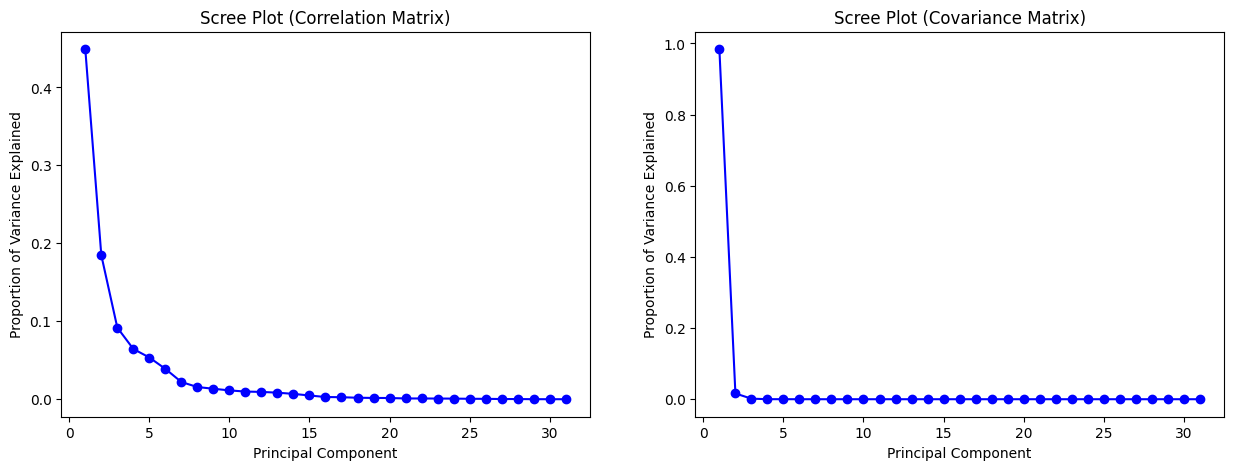

In [ ]:
##Sorting the eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]

##Computing the percent of variance explained by each principal component
explained_variance_ratio_corr = eigenvalues / np.sum(eigenvalues)

print("Explained Variance :", explained_variance_ratio_corr)

# Create a larger figure
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(explained_variance_ratio_corr)+1), explained_variance_ratio_corr, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot (Correlation Matrix)')


plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(explained_variance_ratio_cov)+1), explained_variance_ratio_cov, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot (Covariance Matrix)')

plt.show()


The scree plots using correlation and covariance vary because both capture different aspects of the data. The covariance matrix captures the linear relationship of the data while the correlation matrix captures the strength of the relationships. When we use the correlation matrix, we are essentially standardizing the data by dividing each variable by its standard deviation, which puts all variables on the same scale.


When conducting PCA with the covariance matrix, the resulting principal components are linear combinations of the original variables that explain the maximum amount of variance in the data. The first principal component explains the most variance in the data, followed by the second principal component, and so on.

When conducting PCA with the correlation matrix, the resulting principal components are also linear combinations of the original variables, but they are standardized to have unit variance. This ensures that variables with larger variances do not dominate the PCA analysis. The interpretation of the resulting principal components is similar to that of the covariance matrix.

Overall, the choice of using either the correlation coefficient or covariance matrix depends on the research question and the data being analyzed. If the variables have different scales, it may be better to use the correlation matrix, while if the variables have similar scales, the covariance matrix may be more appropriate.

## 3. For this problem, use the image Geoffrey_Hinton.png in the canvas. Geoffrey Hinton is one of the Godfathers of deep learning, who made significant contributions to the backpropagation algorithm for neural networks. You should apply the Singular Value Decomposition method on the image for compression. Convert the image to a gray scale image initially and then convert it to a numpy array for numerical representation of the image. Finally, you can apply the available SVD package on the data .


## a. Show five compressed images for considering first 10,20,30,40, and 50 singular values. (3 pts)

In [ ]:
from PIL import *

In [ ]:
image_path = "/content/drive/MyDrive/msda/1st sem/math/Assignment_3/Geoffrey_Hinton.png" #import image path


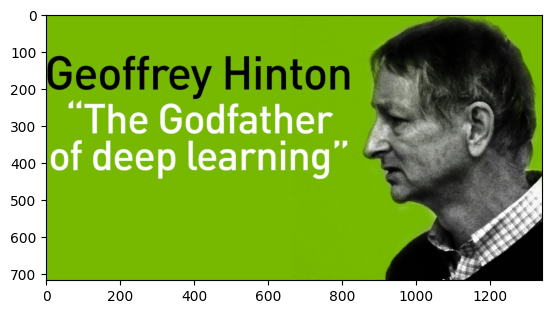

In [ ]:
img = Image.open(image_path)
plt.imshow(img)

In [ ]:
img.size

(1342, 717)

In [ ]:
np.array(img).shape

(717, 1342, 4)

(717, 1342)

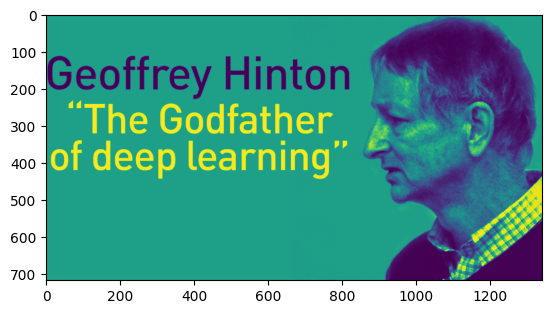

In [ ]:
img_gray = img.convert("L")
plt.imshow(img_gray)
img_array = np.array(img_gray)
img_array.shape

In [ ]:
U, sigma, V = np.linalg.svd(img_array)

In [ ]:
print("Shape of the Left Eigenvectors", U.shape)

Shape of the Left Eigenvectors (717, 717)


In [ ]:
print("First 10 singular values: \n \n", sigma[:10])

First 10 singular values: 
 
 [126941.99129416  18486.64953718  15175.82832049  14302.18317756
  12021.07030265   9380.0752005    8165.12665828   7576.8009349
   6917.98212092   6664.33467642]


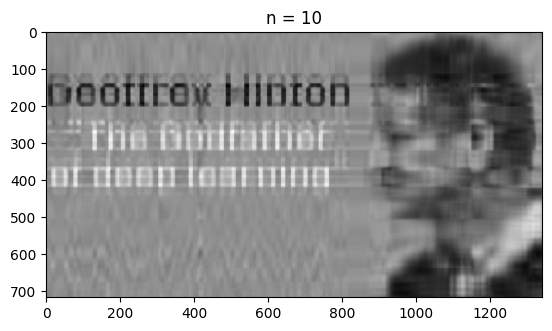

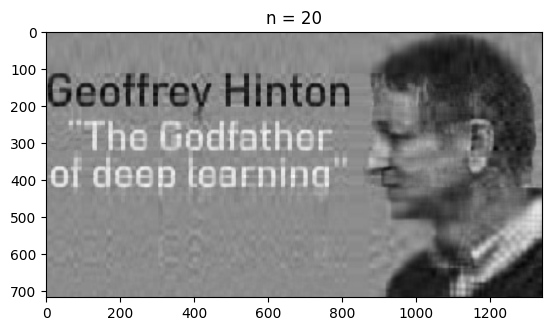

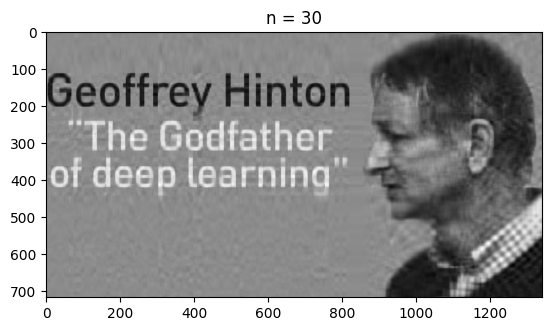

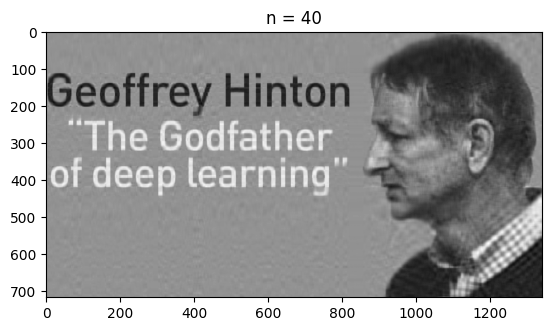

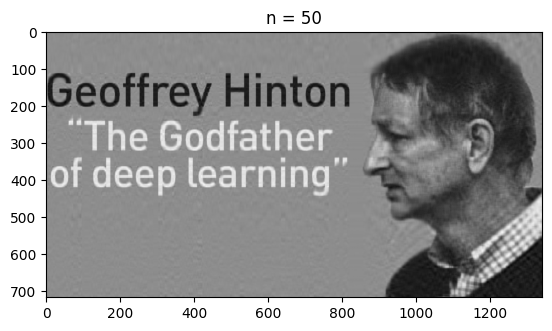

In [ ]:
for i in range(10, 60, 10):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    reconstimg.shape
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

## b.Find the ratio for the compressed image for first 50 singular values. 1pts

In [ ]:
img_array.shape

(717, 1342)

In [ ]:
org_img = np.prod(img_array.shape[0:])
print("full representationo of the image:  ", org_img )

full representationo of the image:   962214


In [ ]:
svd_recon_img = U[:, :50].size + sigma[:50].size + V[:50, :].size
# print(50*717 + 50 + 50 * 1342)
print("reconstructed image full representation:  ", svd_recon_img)

reconstructed image full representation:   103000


In [ ]:
svd_recon_img /org_img

0.10704479460909944

The ratio for the compressed image for first 50 singular values is approximately 10.7%